# Train NN model on the FashionMNIST data

https://www.kaggle.com/zalando-research/fashionmnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

You may refer to this tutorial about the original Mnist:
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

Or any other tutorial you may find online:
https://www.kaggle.com/zalando-research/fashionmnist/code

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000,
          0.0000, 0.0000, 0.0000, 0.2471, 0.1098, 0.0000, 0.0000, 0.0000,
          0.1294, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000,
          0.1098, 0.4941, 0.9451, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 0.9882, 0.9725, 0.4353, 0.0000, 0.0000, 0.0000, 0.0078,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.8078,
          0.9569, 0.9843, 0.9451, 0.9020, 0.9333, 0.8667, 0.8039, 0.9020,
          0.9412, 0.9020, 0.9373, 0.9843, 0.9137, 0.6471, 0.0000, 0.0000,
          0.0078, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.7804, 0.9843,
          0.8941, 0.9176, 0.9137, 0.9255, 0.9216, 0.9608, 0.9686, 0.9294,
          0.9176, 0.9373, 0.9020, 0.9020, 0.9216, 1.0000,

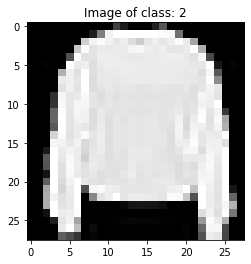

In [3]:
# Lest read a random image from the dataset and draw it
image, label = training_data[7]
print(image)
plt.imshow(image[0], "gray")
plt.title(f"Image of class: {label}")
plt.show()

In [ ]:
# Lets check image shape
image.shape

torch.Size([1, 28, 28])

In [ ]:
# Lets see all the classes available
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Task 1:

Create a DataLoader objects for train and test

In [4]:
data = DataLoader(training_data, batch_size=32, shuffle=True)
test = DataLoader(test_data, batch_size=1, shuffle=True)

# Task 2:

Create a Neural Network

In [5]:
class Network(nn.Module):
  def __init__(self):
        super().__init__()
        self.normalize = nn.functional.normalize
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 200)
        self.fc4 = nn.Linear(200, 10)
        self.relu = nn.functional.relu
        self.softmax = nn.functional.softmax
  def forward(self, x):
    x = x.reshape(-1, 784)
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    output = self.softmax(self.fc4(x), dim=1)
    return output


net = Network()
print(net)

Network(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=10, bias=True)
)


# Task 3:

Specify loss and optimizer

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)


# Task 3:

Train model using for loop

In [7]:
for epoch in range(10):
  for batch, (X, y) in enumerate(data):
      pred = net.forward(X)
      loss = criterion(pred, y)
      
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  if epoch % 10 == 0:
    print(f"Passed epoch {epoch + 1}")

Passed epoch 1


# Task 4:

Report accuracy from train set, and test set independently

In [8]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
def predict(model, dataloader):
  all_preds = torch.tensor([])
  true_vals = torch.tensor([])
  with torch.no_grad():
    for (X, y) in dataloader:
      all_preds = torch.cat((all_preds, model.forward(X)), 0)
      true_vals = torch.cat((true_vals, y), 0)
  return all_preds, true_vals
preds_train, vals_train = predict(net, data)
preds_test, vals_test = predict(net, test)
acc_train = accuracy(preds_train, vals_train)
acc_test = accuracy(preds_test, vals_test)
print("Accuracy on a train set:")
print(acc_train)
print("Accuracy on a test set")
print(acc_test)

Accuracy on a train set:
tensor(0.8613)
Accuracy on a test set
tensor(0.8487)


# Task 5:

Report confussion matrix for the test set

Expected format:
```
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
```

In [9]:
from sklearn.metrics import confusion_matrix
_, preds = torch.max(preds_test, dim=1)
conf_mat = confusion_matrix(vals_test.numpy(), preds.numpy())
print('Confusion matrix')
print(conf_mat)

Confusion matrix
[[868   0   7  43   3   0  71   0   7   1]
 [ 10 915   4  61   5   0   4   0   1   0]
 [ 24   0 841  16  85   0  31   0   3   0]
 [ 27   2   7 902  21   0  39   0   2   0]
 [  0   0 202  54 719   0  22   0   3   0]
 [  0   0   0   3   0 950   0  19   1  27]
 [201   1 153  48 131   0 456   0  10   0]
 [  0   0   0   0   0  40   0 931   0  29]
 [  5   0   6   5   5   4  10   4 961   0]
 [  0   0   0   1   0   3   0  51   1 944]]


# Task 6 (optional):

Train LogisticRegression and DecisionTree models on the same data
Compare their performance to the NN